In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [40]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [41]:
X

array([[ 2.99190986, -8.18780347],
       [-0.77981829, -1.24742319],
       [ 5.05990801, -8.97106415],
       ...,
       [ 3.25459465, -8.64572995],
       [-2.52723524, -2.02696415],
       [ 1.0181829 , -1.15101941]])

In [42]:
y

array([0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2,
       0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 1, 2, 2,
       1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 0, 2, 0, 2,
       2, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1,
       1, 0, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 2, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 1,
       1, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2,
       1, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2,
       1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0,
       1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2,

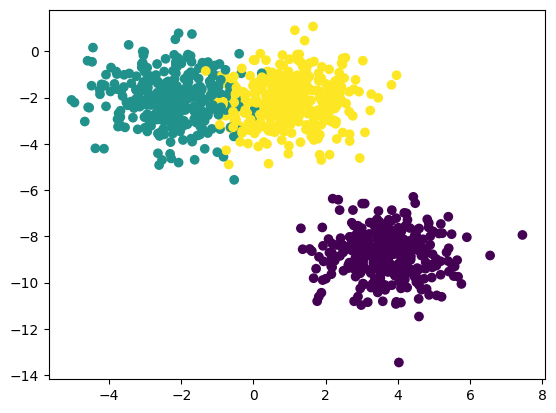

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')

In [44]:
## Standardization -- Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
from sklearn.model_selection import train_test_split    
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
from sklearn.cluster import KMeans

#### ELBOW method to find the optimal number of clusters

In [50]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init= 'k-means++',random_state=0)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [51]:
wcss

[1339.9999999999998,
 329.0280936257738,
 150.00835296205858,
 122.79334051016048,
 104.10226101419912,
 93.08118078975625,
 85.00531404791246,
 73.84161127395566,
 66.4605408523059,
 58.672806054812916]

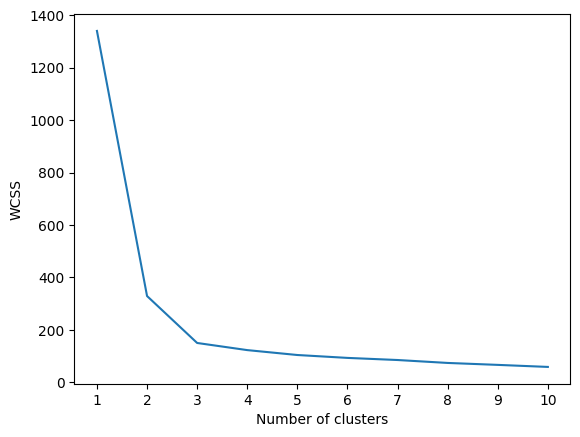

In [52]:
## Plot the elbow curve 
plt.plot(range(1, 11),wcss)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
kmeans = KMeans(n_clusters=3, init= 'k-means++',random_state=0)

In [54]:
kmeans.fit_predict(X_train_scaled)

array([2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 2,
       0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0,
       1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 2,
       0, 1, 2, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 0,
       0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1,
       0, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       1, 0, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1,
       2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1,
       2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0,
       1, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0,
       2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 0, 0, 2,

In [55]:
y_pred = kmeans.predict(X_test_scaled)

In [56]:
y_pred

array([1, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2,
       1, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1,
       2, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 1,
       0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1,
       0, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0,
       0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 2,

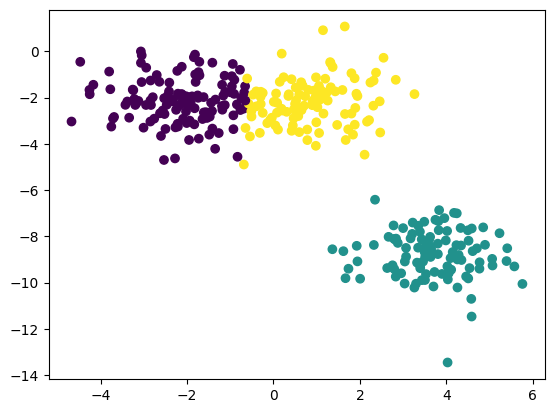

In [57]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, cmap='viridis')

In [61]:
## KNEELOCATER
# !pip install kneed
from kneed import KneeLocator
kl = KneeLocator(range(1,11), wcss, curve = "convex", direction = "decreasing")

In [62]:
kl.elbow

3

In [63]:
## Silhoutte Score
from sklearn.metrics import silhouette_score

In [64]:
silhouette_coefficients = []
for k in range (2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [65]:
silhouette_coefficients

[0.6750795771721643,
 0.6020498045495755,
 0.5101837791524745,
 0.3695040670661128,
 0.366300879051779,
 0.3162130177435963,
 0.3086489210367565,
 0.3363977421401951,
 0.33634923388917715]

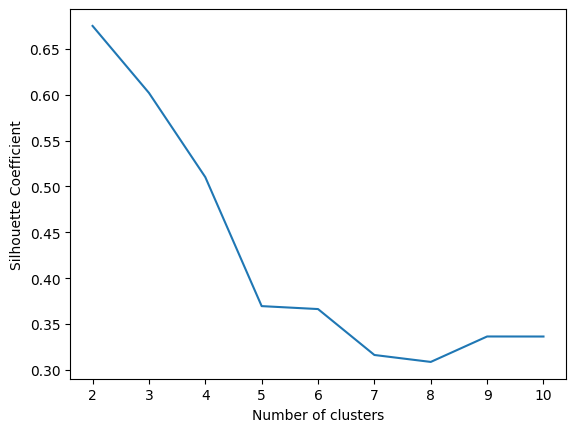

In [66]:
## Plotting silhouette scores for clustering
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()